In [3]:
%store -r experiment_name
experiment_name

'experiment-CIGZKZVFZO'

In [4]:
from sagemaker.analytics import ExperimentAnalytics

In [10]:
import sagemaker, boto3

session = boto3.Session()
sagemaker_session = sagemaker.Session(boto_session=session)

experiment_analytics = ExperimentAnalytics(
    sagemaker_session=sagemaker_session, 
    experiment_name=experiment_name,
)

experiment_details_df = experiment_analytics.dataframe()

In [11]:
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(experiment_details_df)

,TrialComponentName,DisplayName,SourceArn,SageMaker.ImageUri,SageMaker.InstanceCount,SageMaker.InstanceType,SageMaker.VolumeSizeInGB,eta,gamma,max_depth,min_child_weight,num_round,objective,subsample,validation:error - Min,validation:error - Max,validation:error - Avg,validation:error - StdDev,validation:error - Last,validation:error - Count,train:error - Min,train:error - Max,train:error - Avg,train:error - StdDev,train:error - Last,train:error - Count,train - MediaType,train - Value,validation - MediaType,validation - Value,SageMaker.ModelArtifact - MediaType,SageMaker.ModelArtifact - Value,Trials,Experiments,training-input - MediaType,training-input - Value,validation-input - MediaType,validation-input - Value
0,job-SVKXQJNJXR-aws-training-job,job-SVKXQJNJXR,arn:aws:sagemaker:us-east-1:581320662326:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.large,30.0,0.2,3,2,6,20,binary:logistic,0.4,0.157,0.196,0.16680,0.007730,0.168,20.0,0.178333,0.213333,0.185383,0.009089,0.178333,20.0,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,NaN,s3://sagemaker-cookbook-bucket/chapter05/outpu...,[trial-SVKXQJNJXR],[experiment-CIGZKZVFZO],NaN,NaN,NaN,NaN
1,job-DLLKOGQBPW-aws-training-job,job-DLLKOGQBPW,arn:aws:sagemaker:us-east-1:581320662326:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.large,30.0,0.2,4,8,6,20,binary:logistic,0.4,0.160,0.172,0.16455,0.002502,0.164,20.0,0.169000,0.183667,0.174900,0.004384,0.169000,20.0,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,NaN,s3://sagemaker-cookbook-bucket/chapter05/outpu...,[trial-DLLKOGQBPW],[experiment-CIGZKZVFZO],NaN,NaN,NaN,NaN
2,job-DHMUPWSORF-aws-training-job,job-DHMUPWSORF,arn:aws:sagemaker:us-east-1:581320662326:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.large,30.0,0.2,4,8,6,10,binary:logistic,0.4,0.163,0.172,0.16600,0.003937,0.163,5.0,0.176667,0.183667,0.181133,0.003033,0.176667,5.0,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,NaN,s3://sagemaker-cookbook-bucket/chapter05/outpu...,[trial-DHMUPWSORF],[experiment-CIGZKZVFZO],NaN,NaN,NaN,NaN
3,job-WLMUZICGAH-aws-training-job,job-WLMUZICGAH,arn:aws:sagemaker:us-east-1:581320662326:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.large,30.0,0.2,4,2,6,10,binary:logistic,0.4,0.157,0.196,0.16770,0.010853,0.161,10.0,0.179000,0.213333,0.190333,0.010900,0.179000,10.0,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,NaN,s3://sagemaker-cookbook-bucket/chapter05/outpu...,[trial-WLMUZICGAH],[experiment-CIGZKZVFZO],NaN,NaN,NaN,NaN
4,job-EEIGKCWSSO-aws-training-job,job-EEIGKCWSSO,arn:aws:sagemaker:us-east-1:581320662326:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.large,30.0,0.2,4,2,6,20,binary:logistic,0.4,0.157,0.196,0.16655,0.007930,0.168,20.0,0.178000,0.213333,0.185033,0.009297,0.178000,20.0,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,NaN,s3://sagemaker-cookbook-bucket/chapter05/outpu...,[trial-EEIGKCWSSO],[experiment-CIGZKZVFZO],NaN,NaN,NaN,NaN
5,job-UUMPHCNNKS-aws-training-job,job-UUMPHCNNKS,arn:aws:sagemaker:us-east-1:581320662326:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.large,30.0,0.2,3,2,6,10,binary:logistic,0.4,0.157,0.196,0.16770,0.010853,0.161,10.0,0.179000,0.213333,0.190333,0.010900,0.179000,10.0,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,text/csv,s3://sagemaker-cookbook-bucket/chapter05/input...,NaN,s3://sagemaker-cookbook-bucket/chapter05/outpu...,[trial-UUMPHCNNKS],[experiment-CIGZKZVFZO],NaN,NaN,NaN,NaN
6,job-HLMHVSHJLD-aws-training-job,job-HLMHVSHJLD,arn:aws:sagemaker:us-east-1:581320662326:train...,683313688378.dkr.ecr.us-east-1.amazo

In [12]:
from time import sleep

while "validation:error - Avg" not in experiment_details_df:
    experiment_details_df = experiment_analytics.dataframe()
    print("Not yet ready. Sleeping for 10 seconds")
    sleep(10)
    
print("Ready")

Ready


In [13]:
target_fields = [
    "TrialComponentName",
    "DisplayName",
    "eta",
    "gamma",
    "max_depth",
    "min_child_weight",
    "num_round",
    "objective",
    "subsample",
    "validation:error - Avg",
    "train:error - Avg",
    "Trials",
    "Experiments",
]

experiment_summary_df = experiment_details_df[target_fields]

In [14]:
display(experiment_summary_df)

,TrialComponentName,DisplayName,eta,gamma,max_depth,min_child_weight,num_round,objective,subsample,validation:error - Avg,train:error - Avg,Trials,Experiments
0,job-SVKXQJNJXR-aws-training-job,job-SVKXQJNJXR,0.2,3,2,6,20,binary:logistic,0.4,0.16680,0.185383,[trial-SVKXQJNJXR],[experiment-CIGZKZVFZO]
1,job-DLLKOGQBPW-aws-training-job,job-DLLKOGQBPW,0.2,4,8,6,20,binary:logistic,0.4,0.16455,0.174900,[trial-DLLKOGQBPW],[experiment-CIGZKZVFZO]
2,job-DHMUPWSORF-aws-training-job,job-DHMUPWSORF,0.2,4,8,6,10,binary:logistic,0.4,0.16600,0.181133,[trial-DHMUPWSORF],[experiment-CIGZKZVFZO]
3,job-WLMUZICGAH-aws-training-job,job-WLMUZICGAH,0.2,4,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-WLMUZICGAH],[experiment-CIGZKZVFZO]
4,job-EEIGKCWSSO-aws-training-job,job-EEIGKCWSSO,0.2,4,2,6,20,binary:logistic,0.4,0.16655,0.185033,[trial-EEIGKCWSSO],[experiment-CIGZKZVFZO]
5,job-UUMPHCNNKS-aws-training-job,job-UUMPHCNNKS,0.2,3,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-UUMPHCNNKS],[experiment-CIGZKZVFZO]
6,job-HLMHVSHJLD-aws-training-job,job-HLMHVSHJLD,0.2,3,8,6,20,binary:logistic,0.4,0.16240,0.176367,[trial-HLMHVSHJLD],[experiment-CIGZKZVFZO]
7,job-IGYOEWLLKC-aws-training-job,job-IGYOEWLLKC,0.2,3,8,6,10,binary:logistic,0.4,0.16440,0.179233,[trial-IGYOEWLLKC],[experiment-CIGZKZVFZO]
8,job-ZQRUWYEXTU-aws-training-job,job-ZQRUWYEXTU,0.2,3,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-ZQRUWYEXTU],[experiment-CIGZKZVFZO]
9,TrialComponent-2021-04-23-153604-yjbk,trial-metadata-DLLKOGQBPW,0.2,4,8,6,20,binary:logistic,0.4,NaN,NaN,[trial-DLLKOGQBPW],[experiment-CIGZKZVFZO]


In [15]:
import math

def is_not_nan(num):
    return not math.isnan(num)

def remove_nan_rows(df):
    return df[df['train:error - Avg'].map(is_not_nan)]

experiment_summary_df = remove_nan_rows(experiment_summary_df)

experiment_summary_df

,TrialComponentName,DisplayName,eta,gamma,max_depth,min_child_weight,num_round,objective,subsample,validation:error - Avg,train:error - Avg,Trials,Experiments
0,job-SVKXQJNJXR-aws-training-job,job-SVKXQJNJXR,0.2,3,2,6,20,binary:logistic,0.4,0.16680,0.185383,[trial-SVKXQJNJXR],[experiment-CIGZKZVFZO]
1,job-DLLKOGQBPW-aws-training-job,job-DLLKOGQBPW,0.2,4,8,6,20,binary:logistic,0.4,0.16455,0.174900,[trial-DLLKOGQBPW],[experiment-CIGZKZVFZO]
2,job-DHMUPWSORF-aws-training-job,job-DHMUPWSORF,0.2,4,8,6,10,binary:logistic,0.4,0.16600,0.181133,[trial-DHMUPWSORF],[experiment-CIGZKZVFZO]
3,job-WLMUZICGAH-aws-training-job,job-WLMUZICGAH,0.2,4,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-WLMUZICGAH],[experiment-CIGZKZVFZO]
4,job-EEIGKCWSSO-aws-training-job,job-EEIGKCWSSO,0.2,4,2,6,20,binary:logistic,0.4,0.16655,0.185033,[trial-EEIGKCWSSO],[experiment-CIGZKZVFZO]
5,job-UUMPHCNNKS-aws-training-job,job-UUMPHCNNKS,0.2,3,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-UUMPHCNNKS],[experiment-CIGZKZVFZO]
6,job-HLMHVSHJLD-aws-training-job,job-HLMHVSHJLD,0.2,3,8,6,20,binary:logistic,0.4,0.16240,0.176367,[trial-HLMHVSHJLD],[experiment-CIGZKZVFZO]
7,job-IGYOEWLLKC-aws-training-job,job-IGYOEWLLKC,0.2,3,8,6,10,binary:logistic,0.4,0.16440,0.179233,[trial-IGYOEWLLKC],[experiment-CIGZKZVFZO]
8,job-ZQRUWYEXTU-aws-training-job,job-ZQRUWYEXTU,0.2,3,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-ZQRUWYEXTU],[experiment-CIGZKZVFZO]


In [16]:
sorted_df = experiment_summary_df.sort_values('train:error - Avg', ascending=True)
sorted_df

,TrialComponentName,DisplayName,eta,gamma,max_depth,min_child_weight,num_round,objective,subsample,validation:error - Avg,train:error - Avg,Trials,Experiments
1,job-DLLKOGQBPW-aws-training-job,job-DLLKOGQBPW,0.2,4,8,6,20,binary:logistic,0.4,0.16455,0.174900,[trial-DLLKOGQBPW],[experiment-CIGZKZVFZO]
6,job-HLMHVSHJLD-aws-training-job,job-HLMHVSHJLD,0.2,3,8,6,20,binary:logistic,0.4,0.16240,0.176367,[trial-HLMHVSHJLD],[experiment-CIGZKZVFZO]
7,job-IGYOEWLLKC-aws-training-job,job-IGYOEWLLKC,0.2,3,8,6,10,binary:logistic,0.4,0.16440,0.179233,[trial-IGYOEWLLKC],[experiment-CIGZKZVFZO]
2,job-DHMUPWSORF-aws-training-job,job-DHMUPWSORF,0.2,4,8,6,10,binary:logistic,0.4,0.16600,0.181133,[trial-DHMUPWSORF],[experiment-CIGZKZVFZO]
4,job-EEIGKCWSSO-aws-training-job,job-EEIGKCWSSO,0.2,4,2,6,20,binary:logistic,0.4,0.16655,0.185033,[trial-EEIGKCWSSO],[experiment-CIGZKZVFZO]
0,job-SVKXQJNJXR-aws-training-job,job-SVKXQJNJXR,0.2,3,2,6,20,binary:logistic,0.4,0.16680,0.185383,[trial-SVKXQJNJXR],[experiment-CIGZKZVFZO]
3,job-WLMUZICGAH-aws-training-job,job-WLMUZICGAH,0.2,4,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-WLMUZICGAH],[experiment-CIGZKZVFZO]
5,job-UUMPHCNNKS-aws-training-job,job-UUMPHCNNKS,0.2,3,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-UUMPHCNNKS],[experiment-CIGZKZVFZO]
8,job-ZQRUWYEXTU-aws-training-job,job-ZQRUWYEXTU,0.2,3,2,6,10,binary:logistic,0.4,0.16770,0.190333,[trial-ZQRUWYEXTU],[experiment-CIGZKZVFZO]


In [17]:
final_df = sorted_df[["DisplayName", "train:error - Avg"]]
final_df

,DisplayName,train:error - Avg
1,job-DLLKOGQBPW,0.174900
6,job-HLMHVSHJLD,0.176367
7,job-IGYOEWLLKC,0.179233
2,job-DHMUPWSORF,0.181133
4,job-EEIGKCWSSO,0.185033
0,job-SVKXQJNJXR,0.185383
3,job-WLMUZICGAH,0.190333
5,job-UUMPHCNNKS,0.190333
8,job-ZQRUWYEXTU,0.190333


<AxesSubplot:ylabel='DisplayName'>

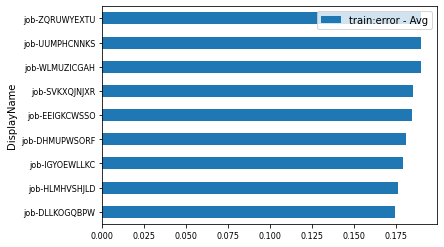

In [18]:
final_df.plot(kind='barh', x="DisplayName", fontsize=8)